## 1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
# 1

import pandas as pd

# 读取数据集
file_path = '2023_6/open_rank_20236.csv'  # 更新为你的文件路径
data = pd.read_csv(file_path)

# 过滤出美国排名前100的项目
top_100_us = data[data['rank'] <= 100]

# 计算统计值
max_value = top_100_us['value'].max()
min_value = top_100_us['value'].min()
mean_value = top_100_us['value'].mean()
median_value = top_100_us['value'].median()

# 输出结果
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"均值: {mean_value}")
print(f"中位数: {median_value}")


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


## 2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [7]:
#2
import pandas as pd

# 读取数据集
file_path = '2022/activity_2022.csv'  # 更新为你的文件路径
data = pd.read_csv(file_path)

# 创建一个空的DataFrame来存储每个项目的增长率
growth_rates = pd.DataFrame()

# 计算每个月的增长率
for i in range(2, 12):  # 从2到11，代表20221_value到202212_value
    month_current = f'2022{i}_value'
    month_previous = f'2022{i-1}_value'
    
    # 计算每个项目的增长率
    growth_rate = (data[month_current] - data[month_previous]) / data[month_previous] * 100
    growth_rates[month_current] = growth_rate  # 存储到DataFrame中

# 添加项目名称
growth_rates['repo'] = range(1, 11)  # 用1到10表示项目编号

# 设置项目编号为索引
growth_rates.set_index('repo', inplace=True)

# 计算每个项目的平均增长率
growth_rates['Average_Growth_Rate'] = growth_rates.mean(axis=1)

# 输出每个项目的增长率及其平均增长率
print(growth_rates)


      20222_value  20223_value  20224_value  20225_value  20226_value  \
repo                                                                    
1        2.521721     9.076101   -16.160183     3.931559    -6.434801   
2      -15.967621     4.919744     8.485529    -0.836306    -9.572701   
3       -6.177501     3.746793    -5.329331    -1.225002     6.157888   
4        2.906556    20.649943   -19.688964     9.808057    -7.881826   
5      -25.852105     4.279516    -8.843367    37.678122    -7.139339   
6        2.358206     2.497984    -9.877600    16.874843   -12.756192   
7       16.235779   -17.361701     3.080693   -10.191192    -3.522871   
8       12.256075     4.693201    -2.890183     1.276492    -7.780820   
9       -0.560853     3.724509     4.613012     7.663601     7.071803   
10     -13.619714     7.081744     4.420919    -2.466370     1.682310   

      20227_value  20228_value  20229_value  202210_value  202211_value  \
repo                                            

## 3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [12]:
# 3
import pandas as pd

# 读取数据集
china_data = pd.read_csv('2022/china_2022.csv')
global_data = pd.read_csv('2022/global_2022.csv')

china_numeric = china_data.drop(columns=['name'])
global_numeric = global_data.drop(columns=['name'])



# 输出基本信息
print("中国开源领域企业基本信息:")
print(china_data.describe())

print("\n全球开源领域企业基本信息:")
print(global_data.describe())

# 比较各项指标
comparison = pd.DataFrame({
    '中国平均值': china_numeric.mean(),
    '全球平均值': global_numeric.mean(),
    '中国标准差': china_numeric.std(),
    '全球标准差': global_numeric.std(),
    '中国最大值': china_numeric.max(),
    '全球最大值': global_numeric.max(),
    '中国最小值': china_numeric.min(),
    '全球最小值': global_numeric.min(),
})  # 使用列名作为索引

print("\n中国与全球开源领域企业各项指标比较:")
print(comparison)

# 计算增量指标的平均值和标准差
comparison['中国rankDelta平均'] = china_data['rankDelta'].mean()
comparison['全球rankDelta平均'] = global_data['rankDelta'].mean()
comparison['中国valueDelta平均'] = china_data['valueDelta'].mean()
comparison['全球valueDelta平均'] = global_data['valueDelta'].mean()

print("\n增量指标比较:")
print(comparison[['中国rankDelta平均', '全球rankDelta平均', '中国valueDelta平均', '全球valueDelta平均']])


中国开源领域企业基本信息:
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.25000

## 4.贝叶斯定理

## 根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

## 非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

## 工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

## 已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [14]:
# 4
# 项目类型的比例
p_T1 = 0.50  # 工具组件型项目
p_T2 = 0.25  # 系统应用型项目
p_T3 = 0.25  # 内容资源型项目

# 带有 HTML/Markdown 标签的项目占比
p_H_given_T1 = 0.10  # 软件类项目
p_H_given_T2 = 0.10  # 软件类项目
p_H_given_T3 = 0.85  # 非软件类项目

# 计算 P(H)
p_H = (p_H_given_T1 * p_T1) + (p_H_given_T2 * p_T2) + (p_H_given_T3 * p_T3)

# 使用贝叶斯公式计算 P(T3 | H)
p_T3_given_H = (p_H_given_T3 * p_T3) / p_H

# 输出结果
print(f"已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率约为 {p_T3_given_H:.4f} ({p_T3_given_H * 100:.2f}%)")


已知一个项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率约为 0.7391 (73.91%)


## 5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [13]:
# 5

# 项目类型的比例
p_T1 = 0.50  # 工具组件型项目
p_T2 = 0.25  # 系统应用型项目
p_T3 = 0.25  # 内容资源型项目

# JavaScript 项目的占比
p_J_given_T1 = 0.35  # 工具组件型项目中的 JavaScript 占比
p_J_given_T2 = 0.10  # 系统应用型项目中的 JavaScript 占比
p_J_given_T3 = 0.10  # 内容资源型项目中的 JavaScript 占比

# 计算 P(J)
p_J = (p_J_given_T1 * p_T1) + (p_J_given_T2 * p_T2) + (p_J_given_T3 * p_T3)

# 使用贝叶斯公式计算 P(T1 | J)
p_T1_given_J = (p_J_given_T1 * p_T1) / p_J

# 输出结果
print(f"已知一个项目是由 JavaScript 语言编写，该项目是工具组件型项目的概率约为 {p_T1_given_J:.4f} ({p_T1_given_J * 100:.2f}%)")


已知一个项目是由 JavaScript 语言编写，该项目是工具组件型项目的概率约为 0.7778 (77.78%)


## 6.根据以下数据建立可视化无向图

#### user = [1, 2, 3, 4]

#### edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

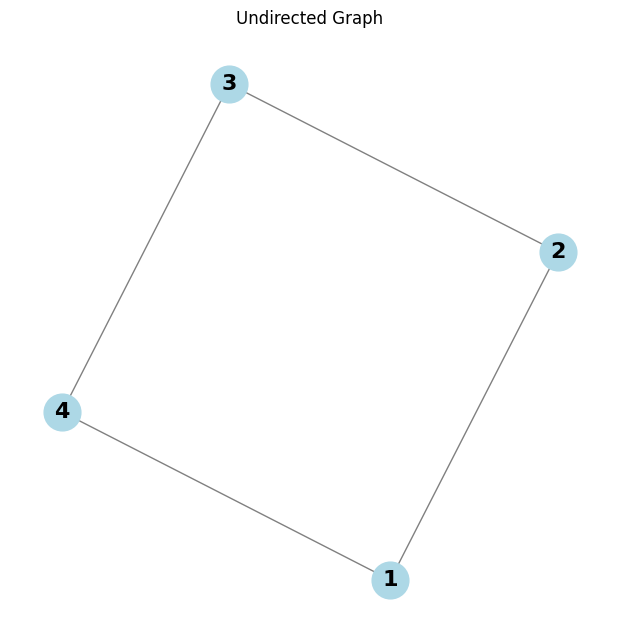

In [15]:
# 6

import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点
G.add_nodes_from(user)

# 添加边
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_weight='bold', edge_color='gray')
plt.title("Undirected Graph")
plt.show()


## 7.根据以下数据建立可视化有向图

#### users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#### edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

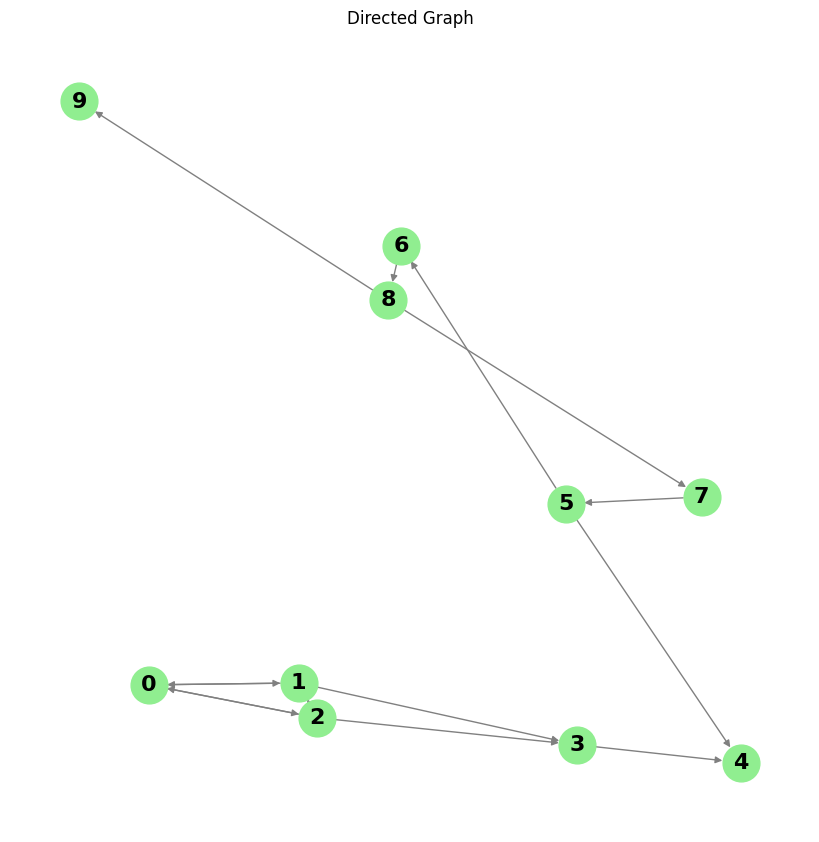

In [1]:
# 7

import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), 
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点
G.add_nodes_from(users)

# 添加边
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 使用弹簧布局
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, font_size=16, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph")
plt.show()


## 8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

每个节点的 PageRank 值:
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


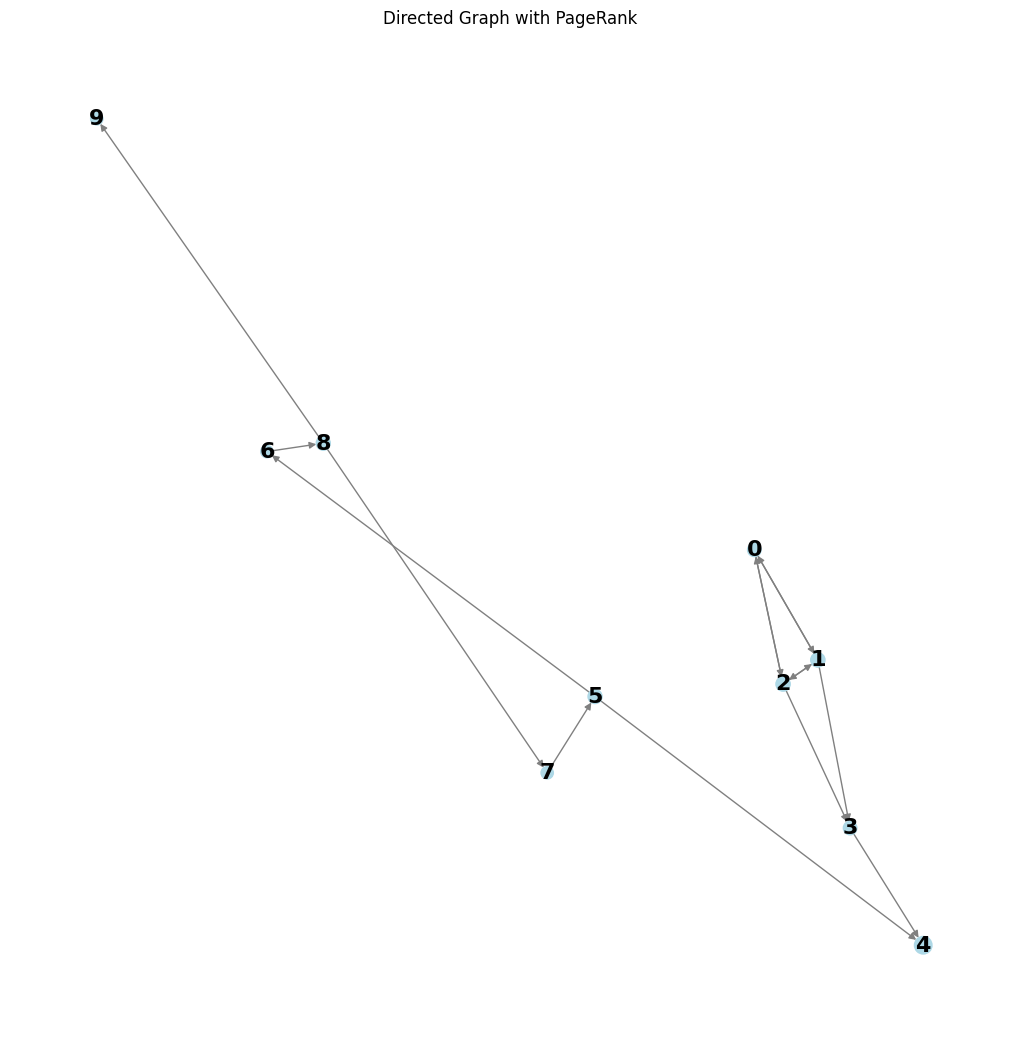

In [2]:
# 8

import networkx as nx
import matplotlib.pyplot as plt

# 定义用户和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), 
         (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算 PageRank
pagerank_values = nx.pagerank(G)

# 输出每个节点的 PageRank 值
print("每个节点的 PageRank 值:")
for node, value in pagerank_values.items():
    print(f"节点 {node}: {value:.4f}")

# 根据 PageRank 值调整节点大小
node_sizes = [v * 1000 for v in pagerank_values.values()]  # 放大 PageRank 值以适应可视化

# 绘制图形
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # 使用弹簧布局
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, 
        font_size=16, font_weight='bold', edge_color='gray', arrows=True)
plt.title("Directed Graph with PageRank")
plt.show()
